In [2]:
import zipfile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import os

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# the rest is up to you!

Results found in file a-2.png


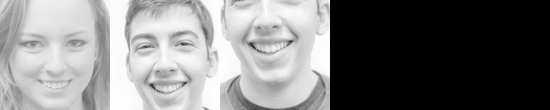

Results found in file a-3.png


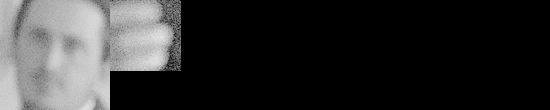

Results found in file a-1.png


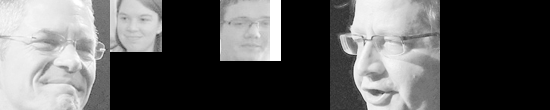

Results found in file a-0.png


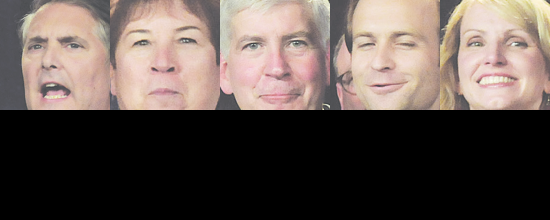

Results found in file a-8.png
There weren't find any faces in that file a-8.png! Error: 'tuple' object has no attribute 'tolist'
Results found in file a-10.png
There weren't find any faces in that file a-10.png! Error: 'tuple' object has no attribute 'tolist'
Results found in file a-13.png


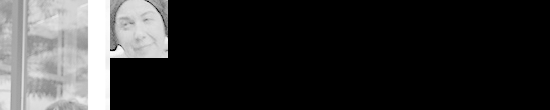

None


In [3]:
pages_list = os.listdir('images')
global_data_structure = []

for name_file in pages_list:
    local_list = [name_file]
    # local_list = []
    # local_list.append(name_file)
    # img = Image.open("images/"+name_file)
    img = Image.open(os.path.join("images", name_file))
    local_list.append(pytesseract.image_to_string(img).replace("-\n", ""))
    global_data_structure.append(local_list)


def finding_name(name, folder):
    for local_list in global_data_structure:
        if name in local_list[1]:
            print("Results found in file", local_list[0])

            try:
                img = Image.open(str(folder+local_list[0]))
                faces = (face_cascade.detectMultiScale(np.array(img), 1.35, 4)).tolist()

                faces_each = []

                # for x, y, w, h in faces:
                #     faces_each.append(img.crop((x, y, x+w, y+w )))
                #     # display((img.crop((x,y,x+w,y+h))).resize((110,110)))
                #     img.crop((x, y, x + w, y + h))

                for x, y, w, h in faces:
                    face_img = img.crop((x, y, x + w, y + h))
                    faces_each.append(face_img)

                contact_sheet = Image.new(img.mode, (550, 110 * int(np.ceil(len(faces_each)/5))))
                x = 0
                y = 0

                for face in faces_each:
                    face.thumbnail((110, 110))
                    contact_sheet.paste(face, (x, y))

                    if x + 100 == contact_sheet.width:
                        x = 0
                        y = y + 110
                    else:
                        x = x + 110

                display(contact_sheet)
            except Exception as e:
                print(f"There weren't find any faces in that file {local_list[0]}! Error: {e}")


print(finding_name("Mark", "images/"))

Results found in file a-3.png


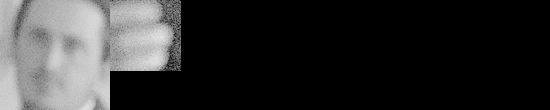

Results found in file a-0.png


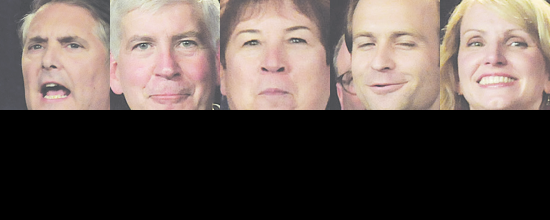

None


In [4]:
pages_list = os.listdir('small_image.png')
global_data_structure = []

for name_file in pages_list:
    local_list = [name_file]
    # local_list = []
    # local_list.append(name_file)
    # img = Image.open("images/"+name_file)
    img = Image.open(os.path.join("small_image.png", name_file))
    local_list.append(pytesseract.image_to_string(img).replace("-\n", ""))
    global_data_structure.append(local_list)


def finding_name(name, folder):
    for local_list in global_data_structure:
        if name in local_list[1]:
            print("Results found in file", local_list[0])

            try:
                img = Image.open(str(folder+local_list[0]))
                faces = (face_cascade.detectMultiScale(np.array(img), 1.35, 4)).tolist()

                faces_each = []

                # for x, y, w, h in faces:
                #     faces_each.append(img.crop((x, y, x+w, y+w )))
                #     # display((img.crop((x,y,x+w,y+h))).resize((110,110)))
                #     img.crop((x, y, x + w, y + h))

                for x, y, w, h in faces:
                    face_img = img.crop((x, y, x + w, y + h))
                    faces_each.append(face_img)

                contact_sheet = Image.new(img.mode, (550, 110 * int(np.ceil(len(faces_each)/5))))
                x = 0
                y = 0

                for face in faces_each:
                    face.thumbnail((110, 110))
                    contact_sheet.paste(face, (x, y))

                    if x + 100 == contact_sheet.width:
                        x = 0
                        y = y + 110
                    else:
                        x = x + 110

                display(contact_sheet)
            except Exception as e:
                print(f"There weren't find any faces in that file {local_list[0]}! Error: {e}")


print(finding_name("Christopher", "small_image.png/"))